In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
gdf = gpd.read_parquet('/gpfs/data1/vclgp/xiongl/MatheusWork/result/gedi_amazon.parquet')

In [43]:
gdf.head()

,rh_098,lon_lowestmode,lat_lowestmode,shot_number,quality_flag,geometry
h3_12,,,,,,
8c8a0cb64996bff,22.580000,-65.126661,-6.676386,111730300400242382,True,POINT (-65.12666 -6.67639)
8c8a0cb64d629ff,25.559999,-65.125328,-6.675954,57131100400242443,True,POINT (-65.12533 -6.67595)
8c8a0cb64d631ff,31.480000,-65.125630,-6.675534,57131100400242442,True,POINT (-65.12563 -6.67553)
8c8a0cb648aebff,19.820000,-65.128770,-6.673458,111730300400242375,True,POINT (-65.12877 -6.67346)
8c8a0cb64c035ff,17.270000,-65.122312,-6.673069,111730200400247690,True,POINT (-65.12231 -6.67307)


In [92]:
df1= gpd.read_parquet('/gpfs/data1/vclgp/xiongl/MatheusWork/result/agg_2019_r12.parquet')
df2= gpd.read_parquet('/gpfs/data1/vclgp/xiongl/MatheusWork/result/agg_2022_r12.parquet')

In [93]:
df1.head()

,rh_098_mean,rh_098_std,geometry
h3_12,,,
8c8a0a00130cbff,23.860001,NaN,"POLYGON ((-63.59977 -4.87963, -63.59985 -4.879..."
8c8a0a00132d1ff,30.340000,NaN,"POLYGON ((-63.60041 -4.88046, -63.60048 -4.880..."
8c8a0a001a0b9ff,25.770000,NaN,"POLYGON ((-63.60249 -4.88342, -63.60257 -4.883..."
8c8a0a001a0d7ff,34.950001,NaN,"POLYGON ((-63.60278 -4.88375, -63.60285 -4.883..."
8c8a0a001a299ff,30.080000,NaN,"POLYGON ((-63.60331 -4.88472, -63.60339 -4.884..."


In [94]:
# Merge dataframes based on column indices
import pandas as pd
result = pd.merge(df1, df2, left_index=True, right_index=True)
len(result)

22881

In [95]:
result['growth'] = result['rh_098_mean_y'] - result['rh_098_mean_x']
result['percent'] =  result['growth']/ result['rh_098_mean_x'] * 100
result['decrease_flag_50'] = result['percent'] < -50
die = result[result['percent'] < -50]

<AxesSubplot:>

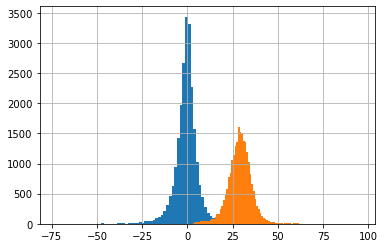

In [96]:
result['growth'].hist(bins=100)
result['rh_098_mean_x'].hist(bins=100)

In [97]:
# decrease > 50%
len(die)

427

In [98]:
len(die[die['growth'] > -30])

367

In [40]:
die.to_parquet('die.parquet')
die[die['growth'] > -30].to_parquet('die_filter.parquet')

<AxesSubplot:>

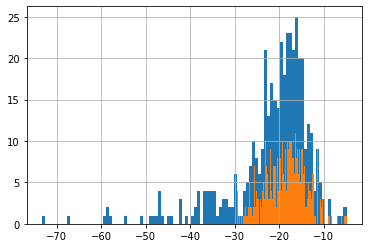

In [99]:
die['growth'].hist(bins=100)
die[die['growth'] > -30]['growth'].hist(bins=100)

In [103]:
die.head(1)

,rh_098_mean_x,rh_098_std_x,geometry_x,rh_098_mean_y,rh_098_std_y,geometry_y,growth,percent,decrease_flag_50
h3_12,,,,,,,,,
8c8a0a448ccc9ff,27.91,NaN,"POLYGON ((-63.34132 -4.71878, -63.34139 -4.718...",12.88,NaN,"POLYGON ((-63.34132 -4.71878, -63.34139 -4.718...",-15.03,-53.851665,True


In [100]:
gdf.head(1)
import h3pandas
gdfh3 = gdf.h3.geo_to_h3(12)
gdfh3.head()

,rh_098,lon_lowestmode,lat_lowestmode,shot_number,quality_flag,geometry
h3_12,,,,,,
8c8a0cb64996bff,22.580000,-65.126661,-6.676386,111730300400242382,True,POINT (-65.12666 -6.67639)
8c8a0cb64d629ff,25.559999,-65.125328,-6.675954,57131100400242443,True,POINT (-65.12533 -6.67595)
8c8a0cb64d631ff,31.480000,-65.125630,-6.675534,57131100400242442,True,POINT (-65.12563 -6.67553)
8c8a0cb648aebff,19.820000,-65.128770,-6.673458,111730300400242375,True,POINT (-65.12877 -6.67346)
8c8a0cb64c035ff,17.270000,-65.122312,-6.673069,111730200400247690,True,POINT (-65.12231 -6.67307)


In [102]:
for index, row in die[:3].iterrows():
    shots_in  = gdfh3.loc[index]
    print(shots_in )

                 rh_098  lon_lowestmode  lat_lowestmode         shot_number  \
h3_12                                                                         
8c8a0a448ccc9ff   27.91      -63.341348       -4.718846   33320500400237196   
8c8a0a448ccc9ff   12.88      -63.341296       -4.718810  226200600100248962   

                 quality_flag                    geometry  
h3_12                                                      
8c8a0a448ccc9ff          True  POINT (-63.34135 -4.71885)  
8c8a0a448ccc9ff          True  POINT (-63.34130 -4.71881)  
                 rh_098  lon_lowestmode  lat_lowestmode         shot_number  \
h3_12                                                                         
8c8a0ab8b61b5ff   15.13      -63.871703       -4.950406   37290500400236567   
8c8a0ab8b61b5ff    3.62      -63.871775       -4.950363  173411100100064551   

                 quality_flag                    geometry  
h3_12                                                      
8c8a0a

In [104]:
import subprocess
for index, row in die.iterrows():
    shots_in  = gdfh3.loc[index]
    for s_index, s_row in shots_in.iterrows():
            #print(s_index)
            # Constructing the command as a string
            command = f"shotnumber2wave.py {s_row['shot_number']} figs_r12 {s_index}"
            print(command)
            # Running the command using the !python shell command
            !python {command}

shotnumber2wave.py 33320500400237196 figs_r12 8c8a0a448ccc9ff
## read l1b and l2a files list...
## beam number:  BEAM0101
## find l1b file:  /gpfs/data1/vclgp/data/iss_gedi/soc/2019/196/GEDI01_B_2019196102848_O03332_04_T03387_02_005_01_V002.h5
## find l2a file:  /gpfs/data1/vclgp/data/iss_gedi/soc/2019/196/GEDI02_A_2019196102848_O03332_04_T03387_02_003_01_V002_10algs.h5
## plotting...
## save plot in jpg...
shotnumber2wave.py 226200600100248962 figs_r12 8c8a0a448ccc9ff
## read l1b and l2a files list...
## beam number:  BEAM0110
## find l1b file:  /gpfs/data1/vclgp/data/iss_gedi/soc/2022/344/GEDI01_B_2022344103356_O22620_01_T11076_02_005_02_V002.h5
## find l2a file:  /gpfs/data1/vclgp/data/iss_gedi/soc/2022/344/GEDI02_A_2022344103356_O22620_01_T11076_02_003_02_V002_10algs.h5
## plotting...
## save plot in jpg...
shotnumber2wave.py 37290500400236567 figs_r12 8c8a0ab8b61b5ff
## read l1b and l2a files list...
## beam number:  BEAM0101
## find l1b file:  /gpfs/data1/vclgp/data/iss_gedi/soc/

In [59]:
gdf.iloc[idx]
# to do 
# give a hexgon : e.g. 8b8a0a2cd2c3fff 
# return nearby shots number 
# return each gedi waveform

,rh_098,lon_lowestmode,lat_lowestmode,shot_number,quality_flag,geometry
h3_12,,,,,,
8c8a0a448ccc9ff,27.91,-63.341348,-4.718846,33320500400237196,True,POINT (-63.34135 -4.71885)
8c8a0a448ccc9ff,12.88,-63.341296,-4.718810,226200600100248962,True,POINT (-63.34130 -4.71881)


In [63]:
# python shotnumber2wave.py <shot_number> <output_dir>
%run shotnumber2wave.py 213000800400239844 figs 8c8a0a448ccc9ff

## read l1b and l2a files list...
## beam number:  BEAM0101
## find l1b file:  /gpfs/data1/vclgp/data/iss_gedi/soc/2019/196/GEDI01_B_2019196102848_O03332_04_T03387_02_005_01_V002.h5
## find l2a file:  /gpfs/data1/vclgp/data/iss_gedi/soc/2019/196/GEDI02_A_2019196102848_O03332_04_T03387_02_003_01_V002_10algs.h5
## plotting...
## save plot in jpg...


In [64]:
%run shotnumber2wave.py 226200600100248962 figs 8c8a0a448ccc9ff

## read l1b and l2a files list...
## beam number:  BEAM0110
## find l1b file:  /gpfs/data1/vclgp/data/iss_gedi/soc/2022/344/GEDI01_B_2022344103356_O22620_01_T11076_02_005_02_V002.h5
## find l2a file:  /gpfs/data1/vclgp/data/iss_gedi/soc/2022/344/GEDI02_A_2022344103356_O22620_01_T11076_02_003_02_V002_10algs.h5
## plotting...
## save plot in jpg...


In [1]:
58/4049

0.014324524573968881